<font size="6"><b>S16 T01: Pipelines, grid search i text mining</b></font>

# Enunciats
**Nivell 1**
1. Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.


**Nivell 2**



**Nivell 3**


## Exercici

### Importació i Preparació de Dades

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('dades/DelayedFlights.csv')
df.head()


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.fillna(0)

df = df.drop(columns=['Unnamed: 0' ])


In [4]:
df['CarrierFzd'] = pd.factorize(df['UniqueCarrier'])[0]
df['OriginFzd'] = pd.factorize(df['Origin'])[0]
df['DestFzd'] = pd.factorize(df['Dest'])[0]

In [5]:
df['TailNumFzd'] = pd.factorize(df['TailNum'])[0]

In [6]:
conditions = [(df['ArrDelay']> 0),(df['ArrDelay']<= 0) ]
values = [1, 0]
df['ArrDelay2'] = np.select(conditions, values)
conditions = [(df['DepDelay']> 0),(df['DepDelay']<= 0) ]
values = [1, 0]
df['DepDelay2'] = np.select(conditions, values)


Després de revisar els valors nuls, s'han factoritzat les variables categòriques i transformat a binàries les variables ArrDelay i DepDelay.
S'avalua la correlació entre variables amb la Correlation Matrix, s'aplica una màscara per la part superior de la mateixa per evitar redundàncies.

<AxesSubplot:>

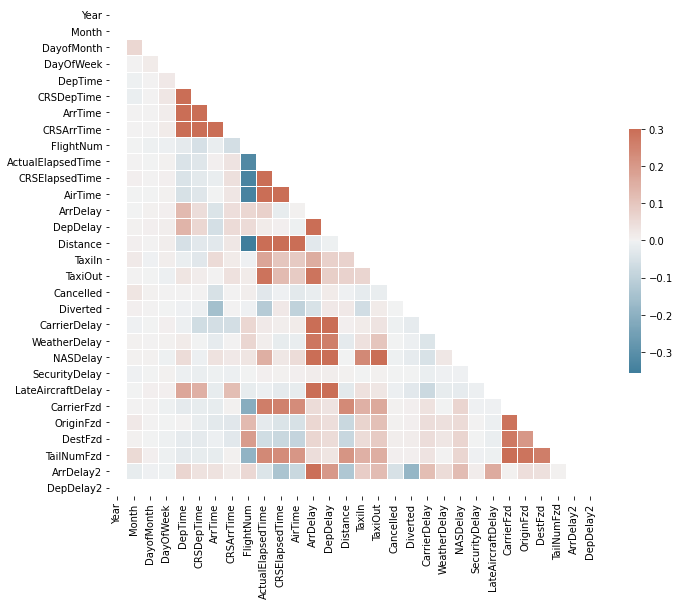

In [7]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Al següent bloc selecionem només les variables més importants suprimint les menys sisgnificatives. 

In [8]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'CarrierFzd', 'OriginFzd', 'DestFzd', 'TailNumFzd', 'ArrDelay2',
       'DepDelay2'],
      dtype='object')

In [9]:
delete_cols= (['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'DepDelay', 'Origin', 'Dest', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'CarrierDelay',
       'SecurityDelay','DepDelay2'])

In [10]:
feature_cols = [c for c in df.columns if (c not in delete_cols) ]
X = df[feature_cols]
X.shape

(1936758, 15)

In [11]:
X = np.array(X)
y = df.ArrDelay2

In [12]:
y.shape

(1936758,)

### model i Pipeline
a partir d'aquí, es creen divideix el grup de dades en train i test, el genera el model, pipeline i es revisen els resultats.

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.02,train_size=0.20,random_state=42,stratify=y )
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print()
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (387351, 15)
X_test (38736, 15)

y_train (387351,)
y_test (38736,)


In [16]:
#Import libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score

from imblearn.pipeline import Pipeline

from collections import Counter
from imblearn.under_sampling import NearMiss


from sklearn.preprocessing import StandardScaler

In [17]:
#define the pipeline
rf_pipeline = Pipeline([
                        ('underSampling', NearMiss(version=1, n_neighbors=3)),                    
                        ('std', StandardScaler(copy=True, with_mean=True, with_std=True)),
                        ('classifier', RF())
                       ])

In [18]:
#define the tuned parameters
tuned_parameters = {
    'classifier__n_estimators': [100],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__class_weight':['balanced',None]
}

In [19]:
clf = GridSearchCV(estimator=rf_pipeline , param_grid=tuned_parameters, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('underSampling', NearMiss()),
                                       ('std', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__class_weight': ['balanced', None],
                         'classifier__max_features': ['auto', 'sqrt'],
                         'classifier__n_estimators': [100]})

In [20]:
print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'classifier__class_weight': 'balanced', 'classifier__max_features': 'auto', 'classifier__n_estimators': 100}


In [26]:
print("Detailed classification report:")
print()  
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))



Detailed classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42669
           1       1.00      1.00      1.00    344682

    accuracy                           1.00    387351
   macro avg       1.00      1.00      1.00    387351
weighted avg       1.00      1.00      1.00    387351



In [29]:
from sklearn import metrics
metrics.confusion_matrix(y_train, y_pred)

array([[ 42669,      0],
       [     0, 344682]], dtype=int64)

In [30]:
print("Detailed classification report:")
print()  
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Detailed classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4267
           1       1.00      1.00      1.00     34469

    accuracy                           1.00     38736
   macro avg       1.00      1.00      1.00     38736
weighted avg       1.00      1.00      1.00     38736



In [31]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 4267,     0],
       [    0, 34469]], dtype=int64)